In [2]:
import pandas as pd # use pandas to read and write csv file
from sklearn.preprocessing import MinMaxScaler # scale the data to format 0-1
import copy # ass
import numpy as np
import random # to randomly generate first k centroids in kmeans algorithm
from matplotlib import pyplot as plt # draw plot
%matplotlib inline

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df #print dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
#function used for step 2

In [4]:
def assignment(df, centroids): 
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['Annual Income (k$)'] - centroids[i][0]) ** 2
                + (df['Spending Score (1-100)'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

In [ ]:
#function used for step 3

In [ ]:
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['Annual Income (k$)'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['Spending Score (1-100)'])
    return k

In [ ]:
#scale data to format 0-1

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])

scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaler.transform(df[['Spending Score (1-100)']])

In [ ]:
# centroids[i] = [x, y]

In [ ]:
k = 3
centroids = {
    i+1: [random.uniform(0,1), random.uniform(0,1)]
    for i in range(k)
}

In [ ]:
centroids

{1: [0.9636300757646937, 0.3420624219095423],
 2: [0.27241154614558916, 0.18944533876247005],
 3: [0.9007653401548988, 0.8148512398829437]}

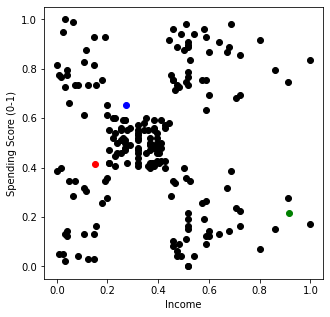

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlabel('Income')
plt.ylabel('Spending Score (0-1)')
plt.show()

In [ ]:
df = assignment(df, centroids)

In [ ]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),distance_from_1,distance_from_2,distance_from_3,closest,color
0,1,Male,19,0.000000,0.387755,0.153569,0.933018,0.380895,1,r
1,2,Male,21,0.000000,0.816327,0.428833,1.096060,0.316016,3,b
2,3,Female,20,0.008197,0.051020,0.391045,0.923756,0.658731,1,r
3,4,Female,23,0.008197,0.775510,0.387805,1.067262,0.289759,3,b
4,5,Female,31,0.016393,0.397959,0.135812,0.918874,0.362075,1,r
...,...,...,...,...,...,...,...,...,...,...
195,196,Female,35,0.860656,0.795918,0.805306,0.582582,0.605715,2,g
196,197,Female,45,0.909836,0.275510,0.771422,0.059874,0.742419,2,g
197,198,Male,32,0.909836,0.744898,0.827322,0.528871,0.644555,2,g
198,199,Male,32,1.000000,0.173469,0.882564,0.093220,0.873053,2,g


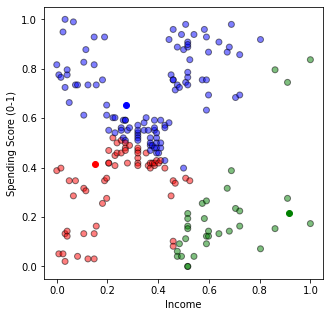

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlabel('Income')
plt.ylabel('Spending Score (0-1)')
plt.show()

In [ ]:
# step 4, 5, 6

In [ ]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break


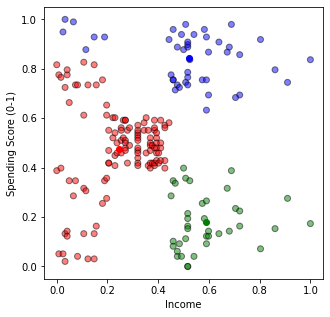

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlabel('Income')
plt.ylabel('Spending Score (0-1)')
plt.show()